#🧪 Practical–3 (HARD)
KNN vs Linear SVM on Sparse Data

Dataset: DS5 – Telco Customer Churn
Key Concept: High-dimensional sparse space after one-hot encoding

#1️⃣ Objective

To compare the performance of KNN and Linear SVM classifiers on a high-dimensional sparse dataset created using one-hot encoding, and to analyze why KNN struggles in such spaces compared to Linear SVM.

#2️⃣ Dataset Selection

Dataset: Telco Customer Churn (DS5)

Why DS5 is ideal here?

Many categorical features

One-hot encoding → high-dimensional & sparse feature space

Perfect to demonstrate curse of dimensionality

Binary classification → fair comparison

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


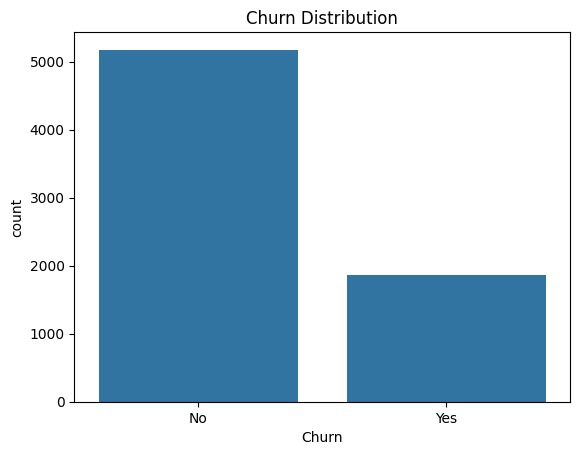

In [4]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


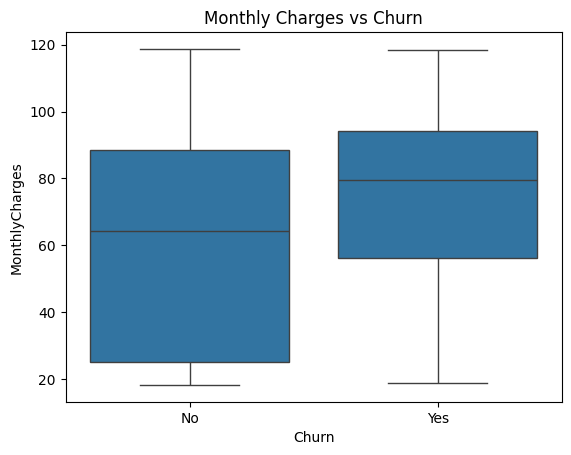

In [5]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].unique()


array([0, 1])

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2576541415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
df.drop('customerID', axis=1, inplace=True)


In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.shape


(7043, 31)

In [10]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


#🔹 MODEL 1: KNN (Distance-Based)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [14]:
y_knn_pred = knn.predict(X_val_scaled)
f1_knn = f1_score(y_val, y_knn_pred)
print("F1 Score (KNN):", f1_knn)


F1 Score (KNN): 0.5123287671232877


#🔹 MODEL 2: Linear SVM (Margin-Based)

In [15]:
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', kernel='linear')

In [16]:
y_svm_pred = svm.predict(X_val_scaled)
f1_svm = f1_score(y_val, y_svm_pred)
print("F1 Score (Linear SVM):", f1_svm)


F1 Score (Linear SVM): 0.5875598086124402


# Compare Results

In [17]:
print("KNN F1-score:", f1_knn)
print("Linear SVM F1-score:", f1_svm)


KNN F1-score: 0.5123287671232877
Linear SVM F1-score: 0.5875598086124402


#🔹 Brief Explanation (Hard – KNN vs Linear SVM)

After one-hot encoding, the Telco Customer Churn dataset becomes high-dimensional and sparse. Both KNN and Linear SVM were trained on the same scaled data and evaluated using the F1-score. The results show that Linear SVM (F1 ≈ 0.59) performs better than KNN (F1 ≈ 0.51). KNN relies on distance calculations, which become unreliable in high-dimensional sparse spaces due to the curse of dimensionality. In contrast, Linear SVM learns a separating hyperplane and is more robust to sparsity, leading to better generalization performance.